In [2]:
%matplotlib inline

In [3]:
import sys
import pathlib

sys.path.append(str(pathlib.Path(__name__).resolve().parent))  # noqa

In [4]:
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy import signal

In [5]:
from metrikai import cleanup

In [6]:
mpl.rc('figure', figsize=(16, 8))
mpl.style.use('seaborn-darkgrid')

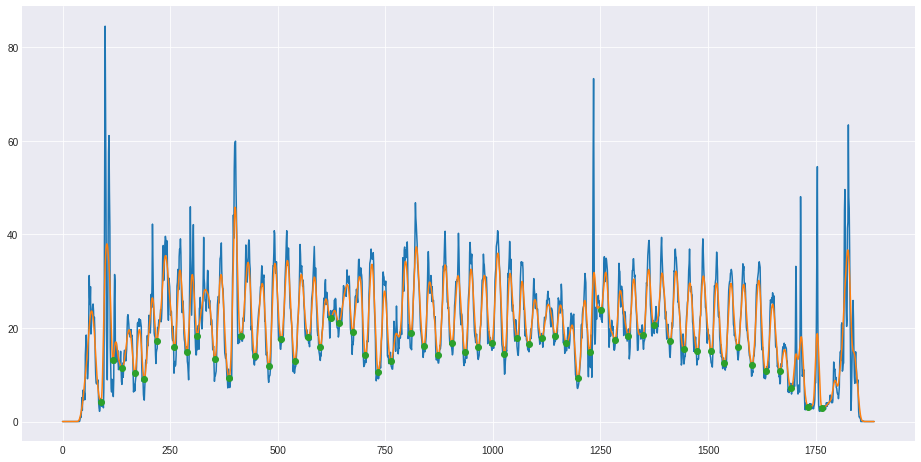

In [15]:
im = cleanup(cv.imread('samples/epaveldas/ru/001/004.jpg', cv.IMREAD_GRAYSCALE))
plt.plot(im.mean(axis=1))

x = im.mean(axis=1)
win = signal.hann(20)
y = signal.convolve(x, win, mode='same') / sum(win)
plt.plot(y)

minimums = signal.argrelmin(y, order=10)[0]
plt.plot(minimums, y[minimums], 'o')

plt.show()

In [48]:
x = [1, 2, 3, 4]
xd = np.diff(x + [5])
print(xd)
signal.convolve(xd, [.5, .5], mode='full')

[1 1 1 1]


array([ 0.5,  1. ,  1. ,  1. ,  0.5])

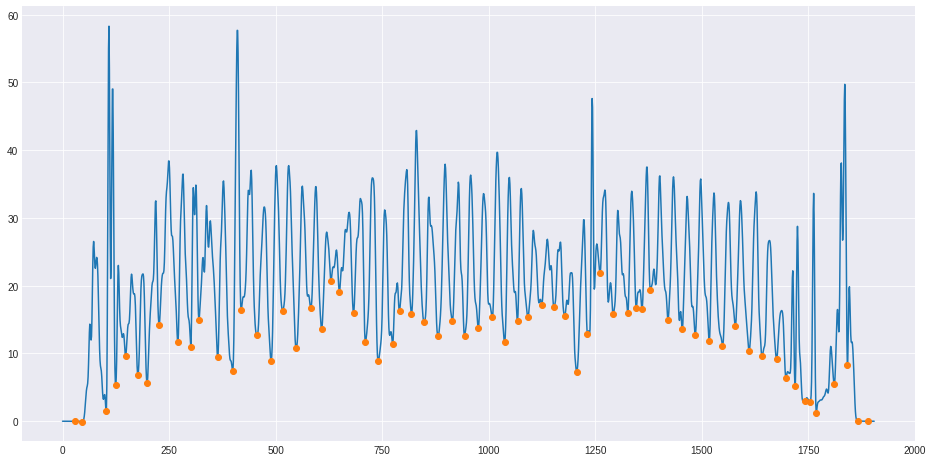

In [84]:
x = im.mean(axis=1)
# plt.plot(x)

win = signal.flattop(20)
y = signal.convolve(x, win) / sum(win)
plt.plot(y)

minimums = signal.argrelextrema(y, np.less_equal, order=10)[0]
minimums = minimums[signal.convolve(np.diff(minimums), [.5, .5], mode='full') > 5]
plt.plot(minimums, y[minimums], 'o')
plt.show()

In [37]:
np.diff([0, 1, 2, 10, 15, 16, 17])

array([1, 1, 8, 5, 1, 1])

In [43]:
len(signal.argrelextrema(y, np.less, order=20)[0]), len(np.diff(signal.argrelextrema(y, np.less, order=20)[0]))

(50, 49)

In [42]:
signal.argrelextrema(y, np.less, order=20)[0]

array([  98,  147,  199,  228,  269,  298,  322,  363,  396,  423,  456,
        488,  517,  549,  580,  608,  651,  683,  713,  743,  772,  819,
        848,  882,  914,  945,  974, 1006, 1036, 1065, 1092, 1122, 1154,
       1207, 1234, 1293, 1324, 1357, 1383, 1420, 1452, 1484, 1516, 1547,
       1578, 1611, 1644, 1702, 1742, 1774])

In [40]:
np.diff(signal.argrelextrema(y, np.less, order=20)[0])

array([49, 52, 29, 41, 29, 24, 41, 33, 27, 33, 32, 29, 32, 31, 28, 43, 32,
       30, 30, 29, 47, 29, 34, 32, 31, 29, 32, 30, 29, 27, 30, 32, 53, 27,
       59, 31, 33, 26, 37, 32, 32, 32, 31, 31, 33, 33, 58, 40, 32])

In [46]:
np.diff(signal.argrelextrema(y, np.less, order=10)[0]).mean()

30.472727272727273

In [48]:
np.diff(signal.argrelextrema(y, np.less, order=10)[0]).std()

4.7476483957066788

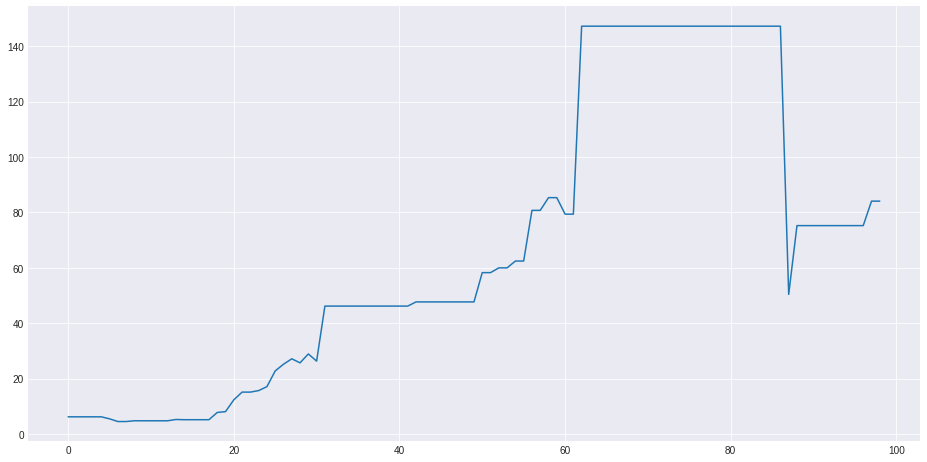

In [51]:
plt.plot([np.diff(signal.argrelextrema(y, np.less, order=i)[0]).std() for i in range(1, 100)])
plt.show()

In [53]:
int(round(min([np.diff(signal.argrelextrema(y, np.less, order=i)[0]).std() for i in range(1, 100)])))

4

In [ ]:
cv.destroyAllWindows()

In [57]:
from sklearn import manifold
from sklearn.cluster import AgglomerativeClustering

In [60]:
data = np.array([
    [1, 2, 3, 4, 5],
    [1, 2, 3, 4, 5],
    [1, 2, 3, 4, 5],
    [1, 2, 3, 4, 5],
    [1, 2, 3, 4, 5],
])
X = manifold.SpectralEmbedding(n_components=2).fit_transform(data)
model = AgglomerativeClustering(linkage='ward', n_clusters=2)
model.fit(X)
model.labels_

array([0, 1, 0, 0, 0])

In [66]:
from sklearn.cluster import DBSCAN

data = np.array([
    [1, 2, 3, 4, 5],
    [1, 2, 3, 4, 5],
    [1, 3, 2, 4, 5],
    [1, 3, 2, 4, 5],
    [1, 2, 2, 2, 2],
    [1, 2, 2, 2, 2],
])

model = DBSCAN(eps=0.3, min_samples=2).fit(data)
model.labels_, model.core_sample_indices_

(array([0, 0, 1, 1, 2, 2]), array([0, 1, 2, 3, 4, 5]))

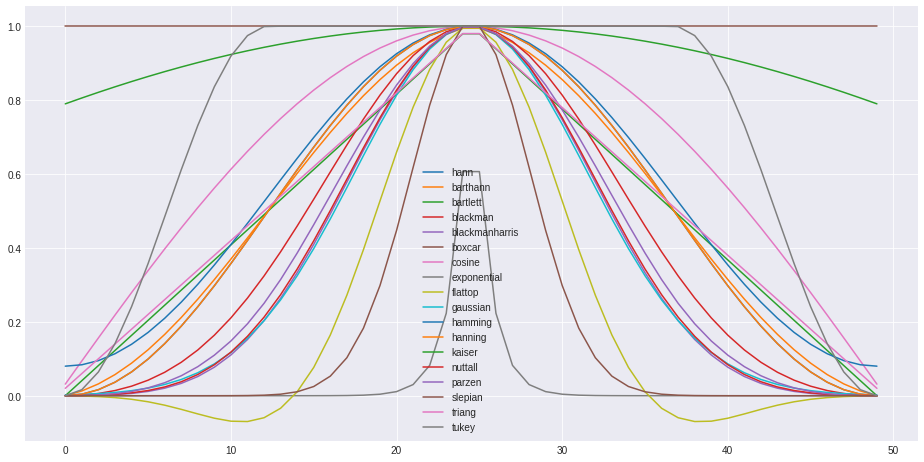

In [80]:
size = 50
windows = [
    ('hann', signal.hann(size)),
    ('barthann', signal.barthann(size)),
    ('bartlett', signal.bartlett(size)),
    ('blackman', signal.blackman(size)),
    ('blackmanharris', signal.blackmanharris(size)),
    ('boxcar', signal.boxcar(size)),
    ('cosine', signal.cosine(size)),
    ('exponential', signal.exponential(size)),
    ('flattop', signal.flattop(size)),
    ('gaussian', signal.gaussian(size, std=7)),
    ('hamming', signal.hamming(size)),
    ('hanning', signal.hanning(size)),
    ('kaiser', signal.kaiser(size, beta=1)),
    ('nuttall', signal.nuttall(size)),
    ('parzen', signal.parzen(size)),
    ('slepian', signal.slepian(size, width=10)),
    ('triang', signal.triang(size)),
    ('tukey', signal.tukey(size)),
]

for title, window in windows:
    plt.plot(window, label=title)
plt.legend()
plt.show()

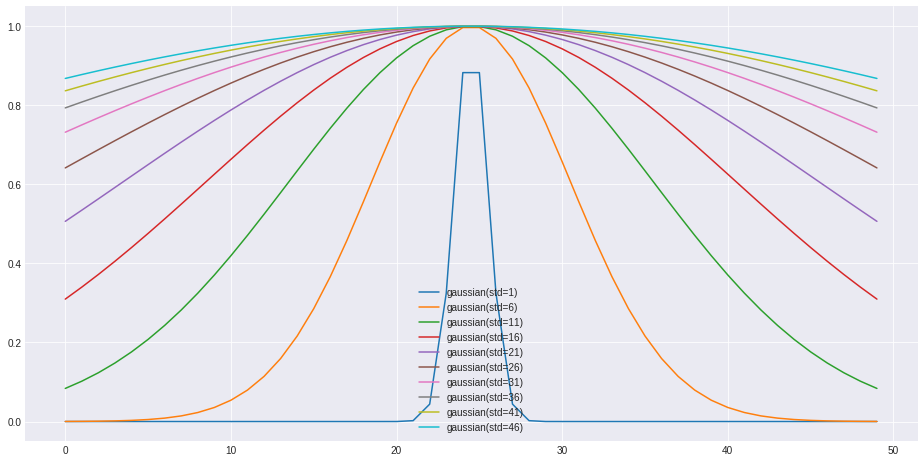

In [83]:
size = 50
for std in range(1, 51, 5):
    plt.plot(signal.gaussian(size, std=std), label=f'gaussian(std={std})')
plt.legend()
plt.show()

In [85]:
import cv2 as cv

In [166]:
im = np.zeros((100, 100), dtype=np.uint8)
pts = np.array([[50, 10], [50, 90], [90, 90], [50, 10]], dtype=int)
cv.polylines(im, [pts], True, 255, 1, cv.LINE_AA)
cv.imshow('test', im)
cv.waitKey(0)
cv.destroyAllWindows()

In [173]:
cv.destroyWindow('test')

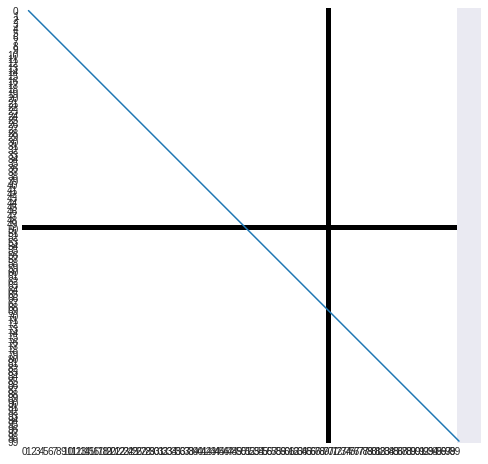

In [83]:
im = np.zeros((100, 100), dtype=np.uint8)
im[50] = 255
im[:,50] = 255

im = np.roll(im, 20, axis=1)

plt.imshow(im)
plt.plot(np.arange(100) + 1, np.arange(100))
plt.xticks(np.arange(100))
plt.yticks(np.arange(100))
plt.grid(False)
plt.show()

In [62]:
a = np.array([
    [1, 2, 3, 4, 5, 6],
    [1, 2, 3, 4, 5, 6],
    [1, 2, 3, 4, 5, 6],
])
a[[[0], [1], [2]], [[1], [2], [3]]]

array([[2],
       [3],
       [4]])

In [59]:
np.arange(3)[:, None]

array([[0],
       [1],
       [2]])

In [64]:
np.arange(3).reshape(-1, 1) + np.arange(6)

array([[0, 1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5, 6],
       [2, 3, 4, 5, 6, 7]])

In [67]:
a = np.array([[1, 2],
              [3, 4]])
a[[0, 1], [[1, 0], [0, 1]]]

array([[2, 3],
       [1, 4]])